# 1. Data Scraping for graph

In [ ]:
import requests
import json
#page = "Dudley_Dursley"
#page = "Fleur_Delacour"
#page = "Nagini"
#page = 'Boggart'
#page = 'Lucius_Malfoy'
#page = 'Salazar_Slytherin'
page = 'List_of_characters_in_translations_of_Harry_Potter'

url = f"https://harrypotter.fandom.com/api.php?action=parse&page={page}&format=json"
response = requests.get(url)
data = response.json()


print(data.keys())
print(data["parse"].keys())


dict_keys(['parse'])
dict_keys(['title', 'pageid', 'revid', 'text', 'langlinks', 'categories', 'links', 'templates', 'images', 'externallinks', 'sections', 'showtoc', 'parsewarnings', 'displaytitle', 'iwlinks', 'properties'])


In [2]:
#print(data["parse"]["pageid"]) # This is the page ID
#print(data["parse"]["text"]) # This contains the HTML content of the page
#print(data['parse']['langlinks']) # This contains links to other language versions of the page
#print(json.dumps(data['parse']['categories'], indent=2)) # This contains the categories the page belongs to
#print(data['parse']['properties']) # This contains various properties of the page

#print(data["parse"]["title"]) # This is the title of the page
#print(data['parse']['categories']) # This contains the categories the page belongs to, we have Wizards we can use to identify characters
print(data['parse']['links']) # This contains all the links on the page, we can use this to find other characters mentioned on the page


[{'ns': 0, 'exists': '', '*': 'Alastor Moody'}, {'ns': 0, 'exists': '', '*': 'Albus Dumbledore'}, {'ns': 0, 'exists': '', '*': 'Amelia Bones'}, {'ns': 0, 'exists': '', '*': 'Amos Diggory'}, {'ns': 0, 'exists': '', '*': 'Anthony Goldstein'}, {'ns': 0, 'exists': '', '*': 'Aragog'}, {'ns': 0, 'exists': '', '*': 'Archie Aymslowe'}, {'ns': 0, 'exists': '', '*': 'Argus Filch'}, {'ns': 0, 'exists': '', '*': 'Arnold Peasegood'}, {'ns': 0, 'exists': '', '*': 'Arthur Weasley'}, {'ns': 0, 'exists': '', '*': 'Avery (Riddle-era)'}, {'ns': 0, 'exists': '', '*': 'Bane'}, {'ns': 0, 'exists': '', '*': 'Bartemius Crouch Senior'}, {'ns': 0, 'exists': '', '*': 'Bellatrix Lestrange'}, {'ns': 0, 'exists': '', '*': 'Bertie Bott'}, {'ns': 0, 'exists': '', '*': 'Bloody Baron'}, {'ns': 0, 'exists': '', '*': 'Broderick Bode'}, {'ns': 0, 'exists': '', '*': 'Buckbeak'}, {'ns': 0, 'exists': '', '*': 'Cadogan'}, {'ns': 0, 'exists': '', '*': 'Cedric Diggory'}, {'ns': 0, 'exists': '', '*': 'Charles Weasley'}, {'ns': 0

In [3]:
# Extract all links from the page and add them to a list
links = data['parse']['links']
characters = []
for link in links:
    characters.append(link['*'])
print(characters)

['Alastor Moody', 'Albus Dumbledore', 'Amelia Bones', 'Amos Diggory', 'Anthony Goldstein', 'Aragog', 'Archie Aymslowe', 'Argus Filch', 'Arnold Peasegood', 'Arthur Weasley', 'Avery (Riddle-era)', 'Bane', 'Bartemius Crouch Senior', 'Bellatrix Lestrange', 'Bertie Bott', 'Bloody Baron', 'Broderick Bode', 'Buckbeak', 'Cadogan', 'Cedric Diggory', 'Charles Weasley', 'Cho Chang', 'Colin Creevey', 'Cornelius Agrippa', 'Cornelius Fudge', 'Crookshanks', 'Cuthbert Binns', 'Cuthbert Mockridge', 'Dean Thomas', 'Dedalus Diggle', 'Dennis Creevey', 'Dobby', 'Dolores Umbridge', 'Draco Malfoy', 'Dudley Dursley', "Dumbledore's Army", 'Eleanor Branstone', 'Emmeline Vance', 'Euan Abercrombie', 'Fang', 'Fat Friar', 'Fat Lady', 'Fawkes', 'Filius Flitwick', 'Firenze', 'Fleur Delacour', 'Fluffy', 'Fred Weasley', 'Gabrielle Delacour', 'Garrick Ollivander', 'George Weasley', 'Gilbert Wimple', 'Gilderoy Lockhart', 'Ginevra Weasley', 'Godric Gryffindor', 'Gregory Goyle', 'Griphook', 'Hannah Abbott', 'Harry Potter',

In [4]:
# Delete non-character links based on known non-character titles
delete_links = ['Harry Potter and the Half-Blood Prince (film)',
                 'Harry Potter in translation','Harry Potter universe',
                 'List of locations in translations of Harry Potter',
                 'Trio',
                 'Harry Potter and the Half-Blood Prince (film)',
                 "Dumbledore's Army",
                 'Order of the Phoenix',
                 'List of titles of Harry Potter books in other languages',
                 'List of wizarding terms in translations of Harry Potter']


In [5]:
# Remove the non character links from the characters list
for link in delete_links:
    if link in characters:
        characters.remove(link)

In [6]:
# defining a function that checks if a link is a character or not based on categories
def is_character(data, proper_categories = ['Wizards', 'Death_Eater_allies', 'Non-magic_people', 'Creatures_found_worldwide', 'Prophesied_individuals', 'Pure-blood_supremacists', 'Unforgivable_Curse_users', 'Pure-bloods', 'Wizard_of_the_Month']):
    print(data['parse']['title'])
    categories = data['parse']['categories']
    cat_names = [c["*"] for c in categories]
    print(cat_names)
    return any(cat in cat_names for cat in proper_categories)


In [7]:
def get_page(character):
    # replace spaces with underscores for URL formatting
    character = character.replace(" ", "_")
    url = f"https://harrypotter.fandom.com/api.php?action=parse&page={character}&format=json"
    response = requests.get(url)
    data = response.json()
    return data

In [8]:
# define a function that returns all links from a given page
def get_links_from_page(data):
    links = data['parse']['links']
    link_titles = []
    for link in links:
        link_titles.append(link['*'])
    return link_titles

In [9]:
# defining a function to get only character links from a list
def get_character_links_from_page(page, character_list):
    all_links = get_links_from_page(page)
    character_links = [link for link in all_links if link in character_list]
    return character_links

In [10]:
# Generate network using nodes from the character list
import networkx as nx
G = nx.DiGraph()

In [11]:
for character in characters:
    # get the page data for the character
    page = get_page(character)
    # check if they are a character
    character_links = get_character_links_from_page(page, characters)
    for link in character_links:
        G.add_edge(character, link)

In [12]:
# Display nodes and edges of network 142 nodes and 5676 edges in non filtered network
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 128
Number of edges: 5175


In [13]:
# Save the graph locally in GEXF format
nx.write_gexf(G, "harry_potter_characters_network.gexf")

In [ ]:
# Load the graph bacl 
G = nx.read_gexf("harry_potter_characters_network.gexf")

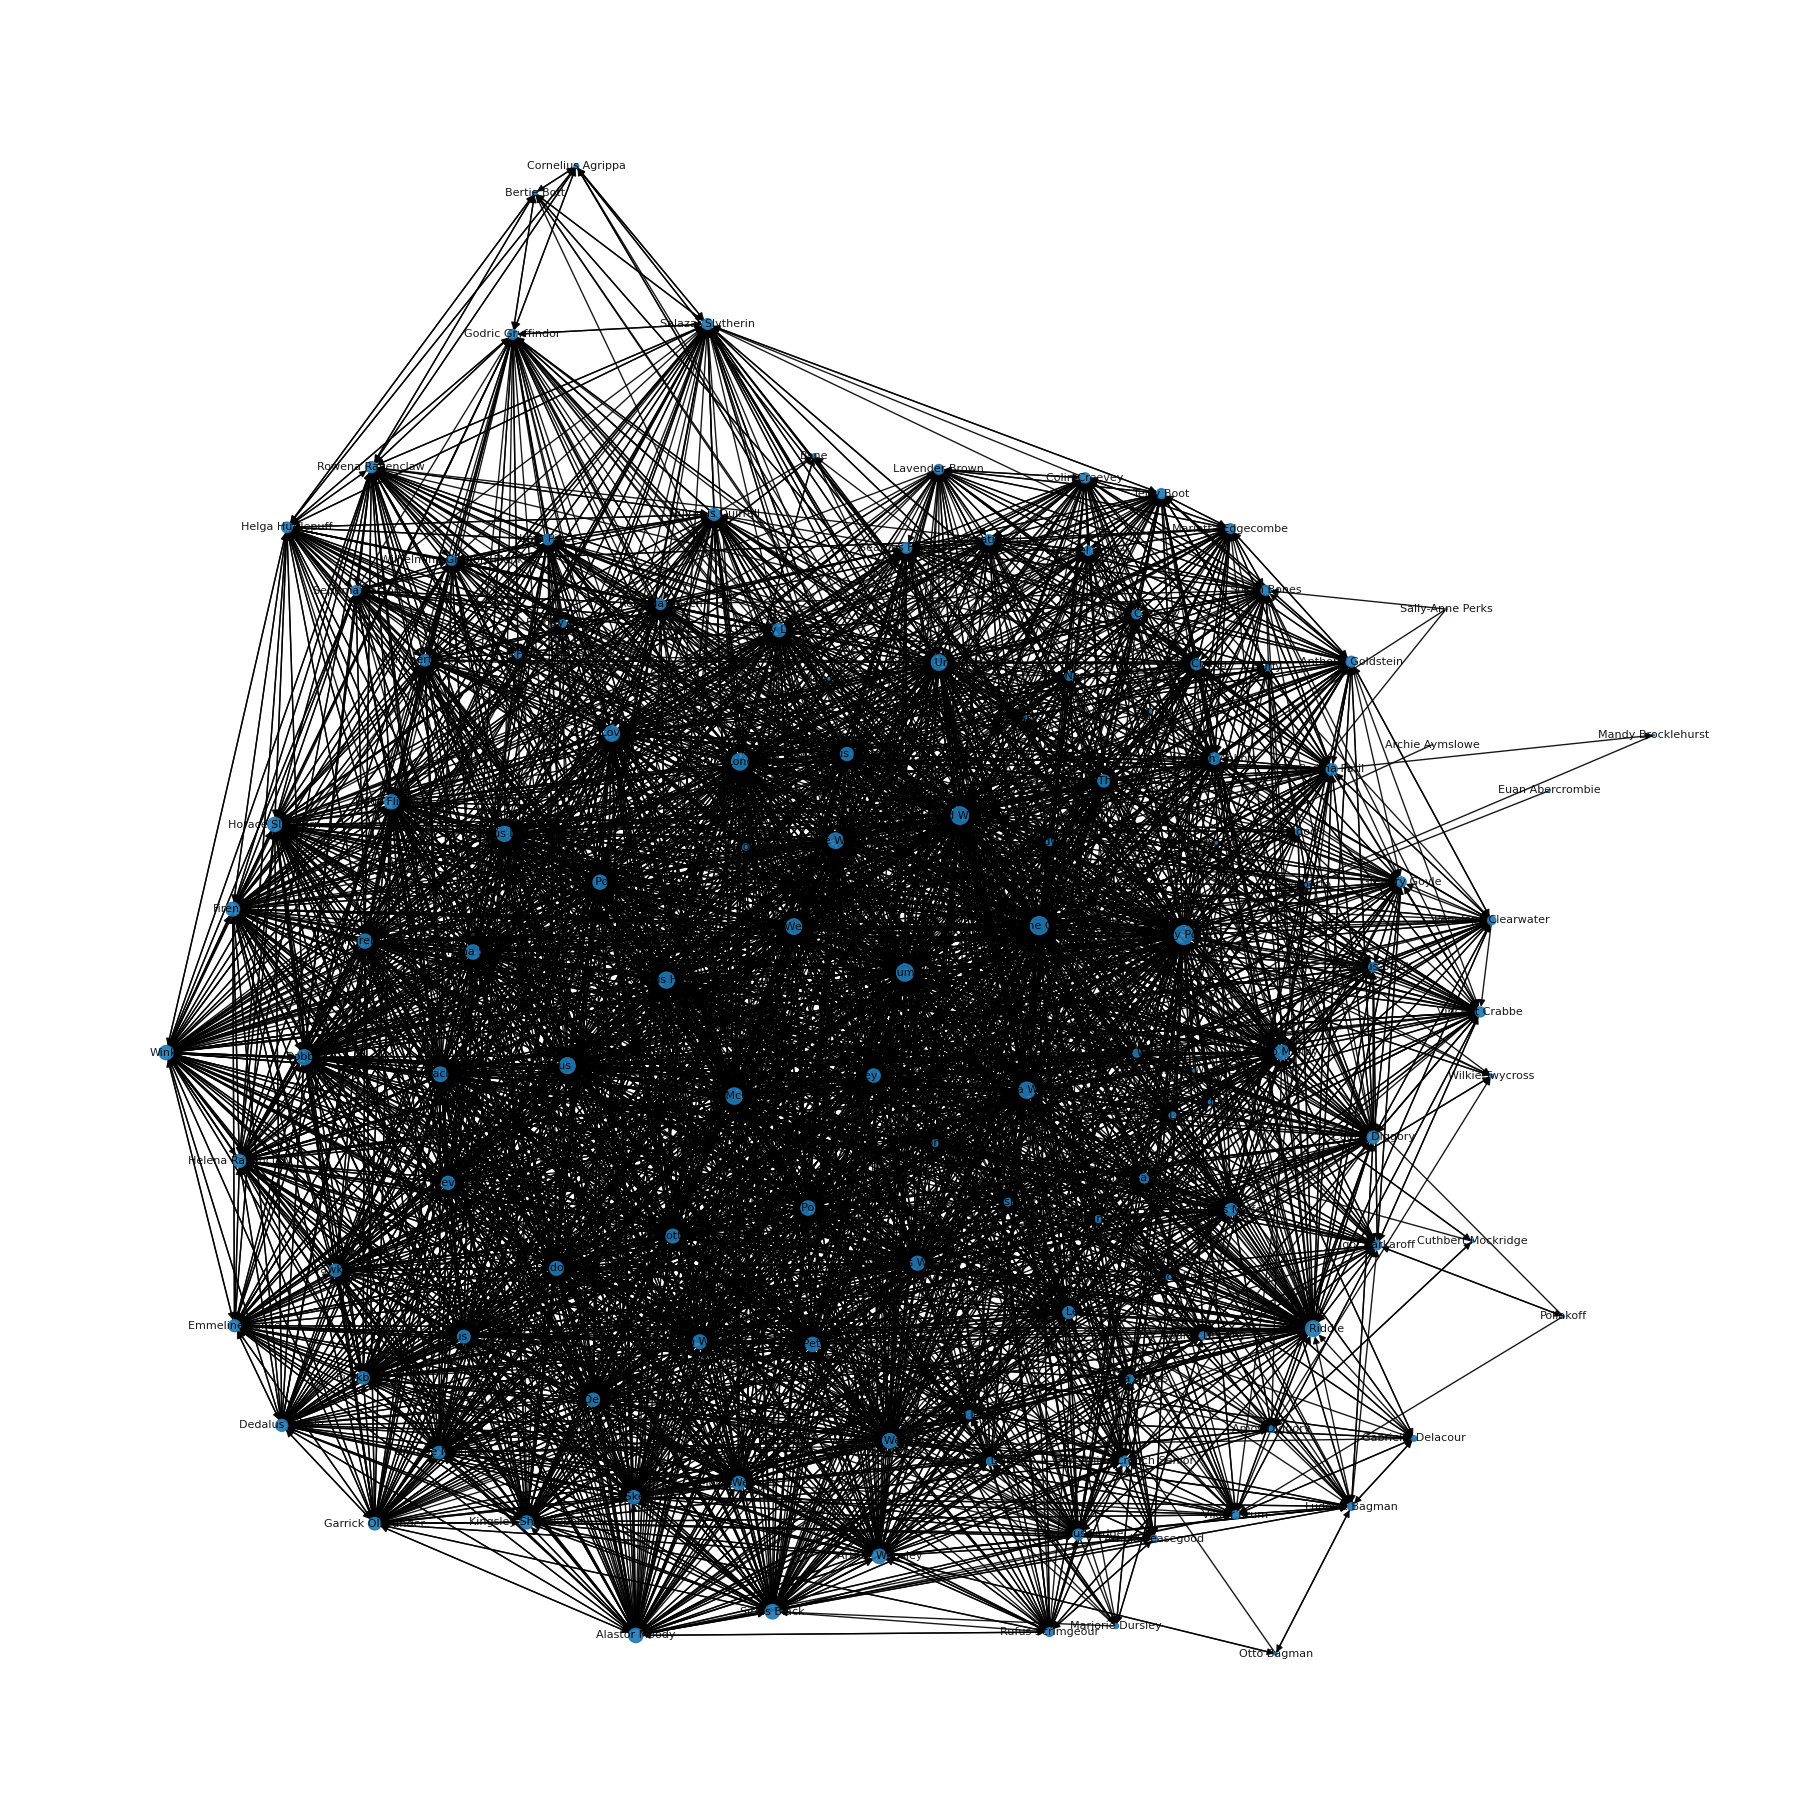

In [14]:
import matplotlib.pyplot as plt
# Play with the force atlas algorhitm to get a visualization you like
degree_b1 = nx.degree_centrality(G)
plt.figure(figsize=(18, 18))
pos = nx.forceatlas2_layout(
    G,
    scaling_ratio=0.5,
    gravity=5, # Applies center of gravity to 
    max_iter=1000
)

# Scale node sizes by eigen centrality (normalize for readability)
sizes_b1 = [v * 100 for v in degree_b1.values()]  # 5000 = scale factor, adjust as needed

# Draw graph
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_size=sizes_b1,
    alpha=0.9,
    font_size=8
)
plt.show()

# 2. Data Scraping for text

In [1]:
# Reading harry potter pdf and 
import PyPDF2
import nltk
from nltk.tokenize import word_tokenize

# Make sure you have nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:

pdf_path = "Harry_Potter_Books_alt/1 - harry-potter-and-the-philosophers-stone-by-jk-rowling.pdf"
#pdf_path = r"C:\Users\lucas\Downloads\harry-potter-and-the-philosophers-stone-by-jk-rowling.pdf"
#pdf_path = "Harry_Potter_Books_alt/allharrypotter.pdf"
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    #for page in reader.pages[7:]:
    for page in reader.pages[7:-3]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
#print(tokens[:100])
# print the last 100 tokens
print(tokens[-20:])
print(f"Total clean tokens: {len(tokens)}")

['magic', 'at', 'home', '.', 'I', '’', 'm', 'going', 'to', 'have', 'a', 'lot', 'of', 'fun', 'with', 'Dudley', 'this', 'summer', '…', '’']
Total clean tokens: 102998


In [ ]:

pdf_path = "Harry_Potter_Books_alt/2 - Harry-Potter-and-the-Chamber-of-Secrets.pdf"
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[5:]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verfigying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['—', 'CHAPTER', 'ONE', '—', 'The', 'Worst', 'Birthday', 'Not', 'for', 'the', 'first', 'time', ',', 'an', 'argument', 'had', 'broken', 'out', 'over', 'breakfast']
The last tokens:['They', '’', 'll', 'be', 'furious', '...', '’', 'And', 'together', 'they', 'walked', 'back', 'through', 'the', 'gateway', 'to', 'the', 'Muggle', 'world', '.']
Total clean tokens: 113803


In [3]:

pdf_path = "Harry_Potter_Books_alt/3 - Harry Potter and the Prisoner of Azkaban.pdf"
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[5:]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verfigying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['Chapter', '1', 'Owl', 'Post', 'Harry', 'Potter', 'was', 'a', 'highly', 'unusual', 'boy', 'in', 'many', 'ways', '.', 'For', 'one', 'thing', ',', 'he']
The last tokens:['Hedwig', 'rattling', 'along', 'in', 'front', 'of', 'him', ',', 'for', 'what', 'looked', 'like', 'a', 'much', 'better', 'summer', 'than', 'the', 'last', '.']
Total clean tokens: 142350


In [5]:

pdf_path = "Harry_Potter_Books_alt/4 - Harry Potter and the Goblet of Fire.pdf"
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[6:]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verfigying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['Chapter', '1', 'The', 'Riddle', 'House', 'The', 'villagers', 'of', 'Little', 'Hangleton', 'still', 'called', 'it', '“', 'the', 'Riddle', 'House', ',', '”', 'even']
The last tokens:['said', ',', 'what', 'would', 'come', ',', 'would', 'come', '…', 'and', 'he', 'would', 'have', 'to', 'meet', 'it', 'when', 'it', 'did', '.']
Total clean tokens: 247371


In [2]:

pdf_path = "Harry_Potter/HP5 - Harry Potter and the Order of the Phoenix.pdf"
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[16:-5]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verfigying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['C', 'H', 'A', 'P', 'T', 'E', 'R', 'O', 'N', 'E', '\x91', '1', '\x91', 'DUDLEY', 'DEMENTED', 'he', 'hottest', 'day', 'of', 'the']
The last tokens:['the', 'sunlit', 'street', ',', 'with', 'Uncle', 'Vernon', ',', 'Aunt', 'Petunia', ',', 'and', 'Dudley', 'hurr', 'ying', 'along', 'in', 'his', 'wake', '.']
Total clean tokens: 356516


In [2]:

#pdf_path = "Harry_Potter_Books_alt/6 - harry-potter-and-the-half-blood-prince-j.k.-rowling.pdf"
pdf_path = "Harry_Potter/HP6 - Harry Potter and the Half-Blood Prince.pdf"
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[13:-5]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verifying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['C', 'H', 'A', 'P', 'T', 'E', 'R', 'O', 'N', 'E', '\x91', '1', '\x91', 'THE', 'OTHER', 'MINISTER', 't', 'was', 'nearing', 'midnight']
The last tokens:['the', 'thought', 'that', 'there', 'was', 'still', 'one', 'last', 'golden', 'day', 'of', 'peace', 'left', 'to', 'enjoy', 'with', 'Ron', 'and', 'Hermione', '.']
Total clean tokens: 236562


In [18]:

#pdf_path = "Harry_Potter_Books_alt/6 - harry-potter-and-the-half-blood-prince-j.k.-rowling.pdf"
pdf_path = "Harry_Potter\HP7 - Harry Potter and the Deathly Hallows.pdf"
#pdf_path = "Harry_Potter_Books_alt/7 - harry-potter-and-the-deathly-hallows-j.k.-rowling.pdf"
text = ""
with open(pdf_path, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages[14:-5]:
        text += page.extract_text() + " "

tokens = word_tokenize(text)

# Keep only alphabetic tokens that are NOT all uppercase
"""
clean_tokens = [
    t for t in tokens
    if t.isalpha() and not t.isupper()
]
"""
# Verifying the starting at chapter 1

print(f'The first tokens:{tokens[:20]}')

# Verifying the ending of final chapter
print(f'The last tokens:{tokens[-20:]}')


print(f"Total clean tokens: {len(tokens)}")

The first tokens:['Harry', 'Potter', 'AND', 'THE', 'DEATHLY', 'HALLOWS', 'C', 'H', 'A', 'P', 'T', 'E', 'R', 'O', 'N', 'E', '\x91', '1', '\x91', 'THE', 'DARK', 'LORD', 'ASCENDING', 'he', 'two', 'men', 'appeared', 'out', 'of', 'no', 'where', ',', 'a', 'few', 'yards', 'apart', 'in', 'the', 'narrow', ',']
The last tokens:['“', 'I', 'know', 'he', 'will.', '”', 'The', 'scar', 'had', 'not', 'pained', 'Harry', 'for', 'nineteen', 'years', '.', 'All', 'was', 'well', '.']
Total clean tokens: 271247


In [3]:
chap_dict = {}

index = 0
chap = 0
n = len(tokens)

def is_CHAPTER(i):
    # Detect C H A P T E R
    return tokens[i:i+7] == ['C','H','A','P','T','E','R'] 

def extract_chapter_number(i):
    # Read uppercase letters (e.g., O N E, T W O, T W E N T Y)
    letters = []
    j = i
    while j < n and len(tokens[j]) == 1 and tokens[j].isupper():
        letters.append(tokens[j])
        j += 1
    
    if letters:
        return "".join(letters), j
    
    # Or read digits like '1'
    if j < n and tokens[j].isdigit():
        return tokens[j], j+1

    return None, i

while index < n:
    if is_CHAPTER(index):
        chap += 1
        index += 7  # skip C H A P T E R letters
        
        # Extract chapter number
        number, next_index = extract_chapter_number(index)
        index = next_index
        
        chap_dict[chap] = []
        
        continue
    
    if chap != 0:
        chap_dict[chap].append(tokens[index])
    
    index += 1


In [4]:
print(chap_dict.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])


In [5]:
# print len of each value in chap_dict
for key in chap_dict.keys():
    print(f"Chapter {key} has {len(chap_dict[key])} tokens.")

Chapter 1 has 7911 tokens.
Chapter 2 has 8534 tokens.
Chapter 3 has 7104 tokens.
Chapter 4 has 8075 tokens.
Chapter 5 has 7735 tokens.
Chapter 6 has 9294 tokens.
Chapter 7 has 6173 tokens.
Chapter 8 has 5721 tokens.
Chapter 9 has 11414 tokens.
Chapter 10 has 8058 tokens.
Chapter 11 has 7983 tokens.
Chapter 12 has 11558 tokens.
Chapter 13 has 12147 tokens.
Chapter 14 has 11202 tokens.
Chapter 15 has 9597 tokens.
Chapter 16 has 8322 tokens.
Chapter 17 has 9320 tokens.
Chapter 18 has 9704 tokens.
Chapter 19 has 9023 tokens.
Chapter 20 has 8951 tokens.
Chapter 21 has 10662 tokens.
Chapter 22 has 11130 tokens.
Chapter 23 has 10378 tokens.
Chapter 24 has 11110 tokens.
Chapter 25 has 10988 tokens.
Chapter 26 has 11633 tokens.
Chapter 27 has 10427 tokens.
Chapter 28 has 11102 tokens.
Chapter 29 has 10292 tokens.
Chapter 30 has 11640 tokens.
Chapter 31 has 10572 tokens.
Chapter 32 has 9065 tokens.
Chapter 33 has 5359 tokens.
Chapter 34 has 6966 tokens.
Chapter 35 has 10534 tokens.
Chapter 36 ha

In [8]:
# print all the times chapter appears in the tokens
for token in range(len(tokens)):
    if tokens[token:token+7] == ['C', 'H', 'A', 'P', 'T', 'E', 'R']:
        print(f"{tokens[token:token+13]} at index {token}")

['C', 'H', 'A', 'P', 'T', 'E', 'R', 'O', 'N', 'E', '\x91', '1', '\x91'] at index 0
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'T', 'W', 'O', '\x91', '19', '\x91'] at index 7014
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'T', 'H', 'R', 'E', 'E', '\x91'] at index 13786
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'F', 'O', 'U', 'R', '\x91', '57'] at index 20061
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'F', 'I', 'V', 'E', '\x91', '81'] at index 28391
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'S', 'I', 'X', '\x91', '105', '\x91'] at index 36986
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'S', 'E', 'V', 'E', 'N', '\x91'] at index 45418
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'E', 'I', 'G', 'H', 'T', '\x91'] at index 54616
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'N', 'I', 'N', 'E', '\x91', '171'] at index 60371
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'T', 'E', 'N', '\x91', '194', '\x91'] at index 68505
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'E', 'L', 'E', 'V', 'E', 'N'] at index 76733
['C', 'H', 'A', 'P', 'T', 'E', 'R', 'T', 'W', 'E', 'L', 'V', 'E

In [ ]:
# Separate tokens from each chapter into a dictionary
chap_dict = {}
current_chap = None
for token in range(len(tokens)):
    if tokens[token] == 'CHAPTER':
        chap_dict[tokens[token + 1]] = []  # Initialize list for chapter title
        current_chap = tokens[token + 1]
    elif current_chap is not None:
        chap_dict[current_chap].append(tokens[token])


In [6]:
import pickle

with open("hp5_tokens.pkl", "wb") as f:
    pickle.dump(chap_dict, f)


In [3]:
import sys

def get_size_mb(obj):
    size_bytes = sys.getsizeof(obj)
    if isinstance(obj, list):
        size_bytes += sum(sys.getsizeof(item) for item in obj)
    return size_bytes / (1024 * 1024)  # Convert bytes → MB

size_mb = get_size_mb(clean_tokens)
print(f"clean_tokens size: {size_mb:.2f} MB")


clean_tokens size: 64.37 MB


In [7]:
# Show context of Harry potter in tokens
harry_contexts = nltk.Text(tokens).concordance("Harry", width=80, lines=10)

Displaying 10 of 3939 matches:
ere peeling away from the up- pers . Harry Potter ’ s appearance di d not endea
he flower bed below . On the whole , Harry thought he was to be congratulated o
the open win- dow , Vernon Dursley , Harry ’ s uncle , suddenly spoke . “ Glad 
r . . . ” The Dursleys fell silent . Harry list ened to a jingle about Fruit ’ 
 frowning and muttering to herself . Harry was very pleased that he was conceal
 friends , he ’ s so popular . . . ” Harry repressed a snort with difficu lty .
every night of the summer holidays . Harry knew perfectly well that Dudley had 
tones at passing cars and children . Harry had seen them at it during his eveni
ded the seven o ’ clock news reached Harry ’ s ears and his stomach turned over
matter : Outside in the flower bed , Harry ’ s stomach seemed to un clench . If
